# Curso de Estadística Bayesiana


#  Regresión Robusta

En este cuaderno veremos como utilizar un comando mágico para poder tener celdas completas con código STAN.

## Autor

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

## Referencias

1. Basado en <url>https://jrnold.github.io/bayesian_notes/</url>

#  Distribuciones de cola pesada


La regresión lineal Bayesiana con errores distribuidos normalmente es sensible a los valores atípicos. Esto se debe a que la distribución normal tiene probabilidades de cola estrechas, con aproximadamente el 99.8% de la probabilidad dentro de tres desviaciones estándar.

La regresión robusta se refiere a métodos de regresión que son menos sensibles a los valores atípicos. La regresión robusta Bayesiana usa distribuciones con colas más pesadas que las normales.

La sigiuente gráfica mustra las funciones de densidad de probabilidad (pdf)  de las distribuciones normal, doble exponencial (Laplace) y Student-t $ (df = 4) $ todas con media 0 y escala 1,




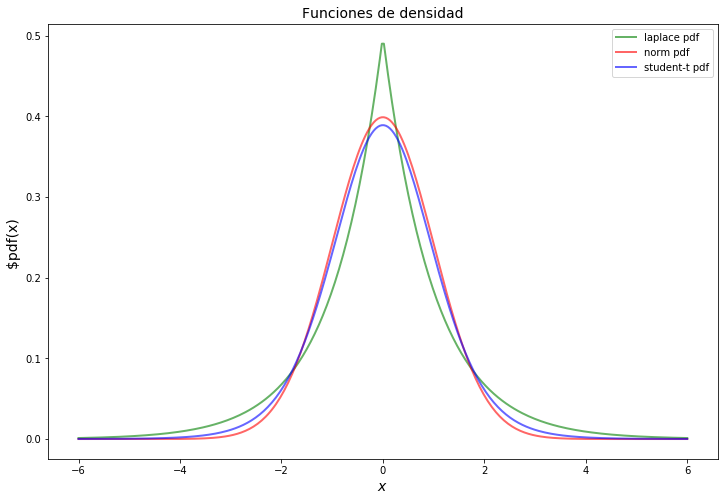

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import laplace
#
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
plt.title('Funciones de densidad',fontsize=14)

x = np.linspace(-6,6,300)
#
y_laplace = laplace.pdf(x)
ax.plot(x, y_laplace, 'g-', lw=2, alpha=0.6, label='laplace pdf')
#
y_norm = norm.pdf(x)
ax.plot(x, y_norm, 'r-', lw=2, alpha=0.6, label='norm pdf')
#
y_student_t = t.pdf(x, df=10)
ax.plot(x, y_student_t, 'b-', lw=2, alpha=0.6, label='student-t pdf')

#
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$pdf(x) ',fontsize=14)
plt.legend()
plt.show()

La siguiente gráfica muestra las funciones de información (diferencial), definida por $-\log pdf(x)$. Esta muestra el **grado de sorpresa** de observar el valor en cada punto.


Tanto la distribución de Student como la doble exponencial tienen valores sorpresa muy por debajo de lo normal en los rangos (-6, 6). Esto significa que los valores atípicos tendrán menos efecto en el log-posterior de los modelos que usan estas distribuciones. La línea de regresión necesitaría moverse menos para incorporar esas observaciones, ya que la distribución del error no las considerará inusuales.

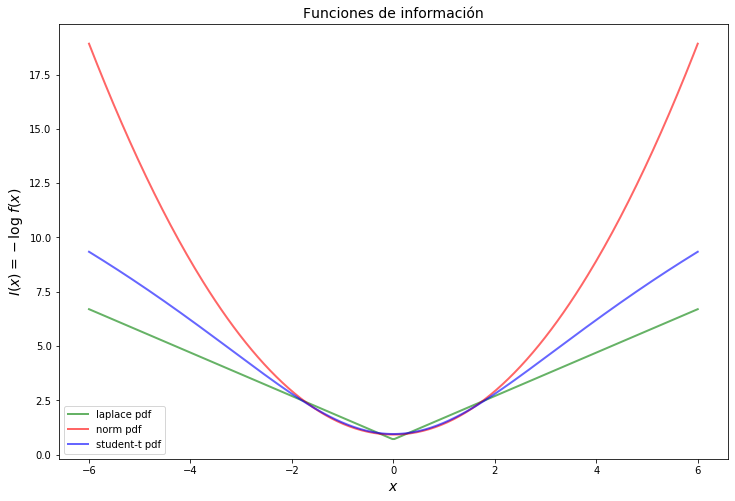

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import laplace
#
fig, ax = plt.subplots(1, 1,figsize=(12, 8))
plt.title('Funciones de información',fontsize=14)

x = np.linspace(-6,6,300)
#
y_laplace = -np.log(laplace.pdf(x))
ax.plot(x, y_laplace, 'g-', lw=2, alpha=0.6, label='laplace pdf')
#
y_norm = -np.log(norm.pdf(x))
ax.plot(x, y_norm, 'r-', lw=2, alpha=0.6, label='norm pdf')
#
y_student_t = -np.log(t.pdf(x, df=10))
ax.plot(x, y_student_t, 'b-', lw=2, alpha=0.6, label='student-t pdf')

#
plt.xlabel('$x$',fontsize=14)
plt.ylabel('$I(x) = -\log \ f(x)$',fontsize=14)
plt.legend()
plt.show()

# Distribución t-Student


El modelo Bayesiano más utilizado para la regresión robusta es una regresión lineal con errores  independientes Student-$t$ (Geweke 1993; A. Gelman, Carlin, et al. 2013, Ch. 17)
    
    
$$
y_i \sim t\text{-Student}\left(\nu, \mu_i, \sigma \right)
$$
    
$ \nu \in  \mathcal{R}^{+} $ es un parámetro de grados de libertad, $ \mu_i \in \mathcal{R} $ son ubicaciones específicas de observación a menudo modeladas con una regresión, y $ \sigma \in \mathcal{R} ^ {+} $ es un parámetro de escala. La fdp de la distribución $ t $-Student  está dado por
    
$$
t\text{-Student} \left(x; \nu, \mu, \sigma \right) = K \left(1 + \frac {1}{\nu} \left(\frac {x- \mu}{\sigma} \right)^2 \right)^{- \frac{\nu + 1} {2}},
$$

donde $ K $ es una constante de normalización.

    
Tenga en cuenta que cuando $ \nu \to \infty $, este modelo se aproxima a un modelo normal independiente, ya que la distribución de $ t $-Student se aproxima asintóticamente a la distribución normal a medida que aumentan los grados de libertad. Para el valor de $ \nu $, se puede usar un bajo grado de libertad, digamos $ \nu \in (4, 6) $, o se le puede asignar una distribución previa.



Para la distribución de $t$-Student, la existencia de varios momentos depende del valor de $ \nu $: la media existe para $ \nu \ge 1 $ varianza para $ \nu \ge 2 $, y la curtosis para $ \nu \ge 3 $.

Como tal, a menudo es útil restringir el soporte de $ \nu $ a al menos 1 o 2 (o incluso más) para garantizar la existencia de una media o variación.

Una distribución previa razonable para el parámetro de grados de libertad es un Gamma
distribución con el parámetro de forma 2 y un parámetro de escala inversa (velocidad) de 0.1 (Juárez and Steel 2010, @Stan-prior-choices), $\nu \sim Gamma(2, 10)$.

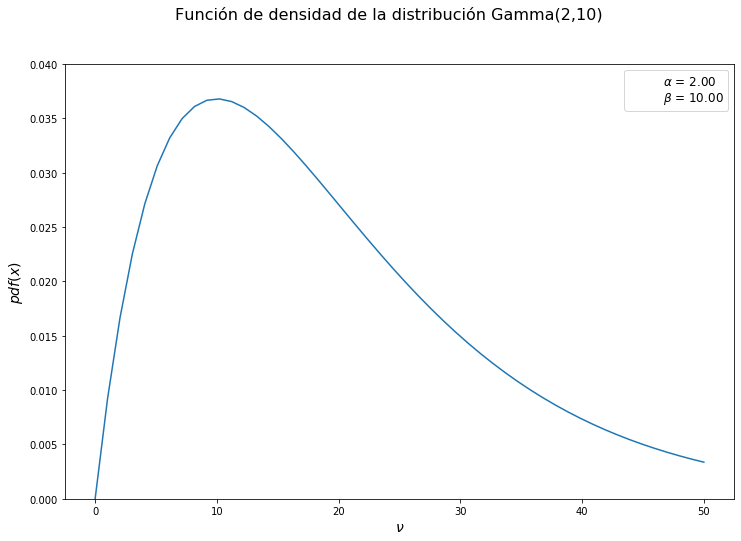

In [11]:
# gráficos de la distribución Gamma
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma


x = np.linspace(0,50,50)             
fig, ax = plt.subplots(1, 1, figsize=(12,8))
alpha = 2
beta  = 10
y = gamma.pdf(x, alpha, loc=0, scale=beta)
ax.set_ylim(0,0.04)
ax.plot(x,y)
ax.plot(0, 0, label="$\\alpha$ = {:3.2f}\n$\\beta$ = {:3.2f}".format(alpha, beta), alpha=0)
ax.legend(fontsize=12)
ax.set_xlabel('$\\nu$', fontsize=14)
ax.set_ylabel('$pdf(x)$', fontsize=14)
fig.suptitle('Función de densidad de la distribución Gamma(2,10)',fontsize=16)
plt.show()
    

Esta densidad coloca la mayoría de la masa anterior para valores $\nu \le 50$, en los que la distribución de $t$-Student es sustancialmente diferente de la distribución Normal, y también permite que existan todos los momentos anteriores.

# Datos

Algunos autores han debatido si la política y la economía de la izquierda han tenido un impacto sostenido en el crecimiento económico de las democracias capitalistas relativamente ricas desde 1973. Los datos se refieren al crecimiento de algunos países entre 1978 y 1982. El autor afirma que el crecimiento acelerado se debe ambos: los sindicatos eran organizacionalmente fuertes y los partidos de izquierda eran fuertes participantes en los gobiernos.


In [12]:
import pandas as pd
import numpy as np
path = "./datos/"
econ_growth = pd.read_csv(path +"econ_growth.csv")

In [13]:
econ_growth.head()

,country,econ_growth,labor_org,social_dem
0,Australia,0.51,1.87,30.5
1,Austria,0.64,3.06,100.0
2,Belgium,0.44,2.80,21.0
3,Canada,0.50,0.98,0.0
4,Denmark,0.36,2.77,75.5


In [14]:
econ_growth.describe().T

,count,mean,std,min,25%,50%,75%,max
econ_growth,15.0,0.514667,0.175616,0.26,0.440,0.51,0.545,1.05
labor_org,15.0,2.000000,1.001335,0.43,1.225,1.87,2.785,3.52
social_dem,15.0,41.553333,37.443078,0.00,4.100,40.20,75.150,100.00


In [15]:
# add a new column to the data frame. cross effect labor_org*social_dem
econ_growth['labor_soc_dem'] = econ_growth.labor_org * econ_growth.social_dem
econ_growth.head()

,country,econ_growth,labor_org,social_dem,labor_soc_dem
0,Australia,0.51,1.87,30.5,57.035
1,Austria,0.64,3.06,100.0,306.000
2,Belgium,0.44,2.80,21.0,58.800
3,Canada,0.50,0.98,0.0,0.000
4,Denmark,0.36,2.77,75.5,209.135


In [17]:
# normalizing the columns of data
# install sklearn
# pip install sklearn
from sklearn.preprocessing import StandardScaler as SS

econ_growth['growth_ss'] = SS().fit_transform(econ_growth[['econ_growth']])
econ_growth['labor_ss'] = SS().fit_transform(econ_growth[['labor_org']])
econ_growth['soc_dem_ss'] = SS().fit_transform(econ_growth[['social_dem']])
econ_growth['labor_soc_dem_ss'] = SS().fit_transform(econ_growth[['labor_soc_dem']])
econ_growth.head()

,country,econ_growth,labor_org,social_dem,labor_soc_dem,growth_ss,labor_ss,soc_dem_ss,labor_soc_dem_ss
0,Australia,0.51,1.87,30.5,57.035,-0.027506,-0.134383,-0.305565,-0.479036
1,Austria,0.64,3.06,100.0,306.000,0.738728,1.095742,1.615734,1.874051
2,Belgium,0.44,2.80,21.0,58.800,-0.440093,0.826975,-0.568188,-0.462354
3,Canada,0.50,0.98,0.0,0.000,-0.086447,-1.054393,-1.148725,-1.018101
4,Denmark,0.36,2.77,75.5,209.135,-0.911621,0.795963,0.938441,0.958534


## Instalando el comando mágico de pystan

Este comando permite escribir código Stan directamente en una celda. Lo primero que hay que hace es  instalar el comando. En la siguiente código se muestra una forma de hacer la instalación.

Para detalles vea el sitio [stan-magic]( https://github.com/Arvinds-ds/stanmagic/blob/master/StanMagic-Help.ipynb)

In [18]:
import pystan
%load_ext stanmagic

In [19]:
%%stan -f Robust_reg.stan
// Linear Model with Student-t Errors
data {
  // number of observations
  int N;
  // response
  vector[N] y;
  // number of columns in the design matrix X
  int K;
  // design matrix X
  // should not include an intercept
  matrix [N, K] X;
  // priors on alpha
  real scale_alpha;
  vector[K] scale_beta;
  real loc_sigma;
  // keep responses
  int use_y_rep;
  int use_log_lik;
}
parameters {
  // regression coefficient vector
  real alpha;
  vector[K] beta;
  real sigma;
  // degrees of freedom;
  // limit df = 2 so that there is a finite variance
  real nu;
}
transformed parameters {
  vector[N] mu;

  mu = alpha + X * beta;
}
model {
  // priors
  alpha ~ normal(0.0, scale_alpha);
  beta ~ normal(0.0, scale_beta);
  sigma ~ exponential(loc_sigma);
  // see Stan prior distribution suggestions
  nu ~ gamma(2, 0.1);
  // likelihood
  y ~ student_t(nu, mu, sigma);
}
generated quantities {
  // simulate data from the posterior
  vector[N * use_y_rep] y_rep;
  // log-likelihood posterior
  vector[N * use_log_lik] log_lik;
  for (i in 1:num_elements(y_rep)) {
    y_rep[i] = student_t_rng(nu, mu[i], sigma);
  }
  for (i in 1:num_elements(log_lik)) {
    log_lik[i] = student_t_lpdf(y[i] | nu, mu[i], sigma);
  }
}

Using pystan.stanc compiler..
-------------------------------------------------------------------------------
Model compiled successfully. Output stored in _stan_model object.
Type _stan_model in a cell to see a nicely formatted code output in a notebook
     ^^^^^^^^^^^
Access model compile output properties
_stan_model.model_file -> Name of stan_file [Robust_reg.stan]
_stan_model.model_name -> Name of stan model [Robust_reg_model]
_stan_model.model_code -> Model code [// Linear Model with ....]


In [20]:
_stan_model

model_file: Robust_reg.stan
model_name: Robust_reg_model
model_code:
// Linear Model with Student-t Errors
data {
  // number of observations
  int N;
  // response
  vector[N] y;
  // number of columns in the design matrix X
  int K;
  // design matrix X
  // should not include an intercept
  matrix [N, K] X;
  // priors on alpha
  real scale_alpha;
  vector[K] scale_beta;
  real loc_sigma;
  // keep responses
  int use_y_rep;
  int use_log_lik;
}
parameters {
  // regression coefficient vector
  real alpha;
  vector[K] beta;
  real sigma;
  // degrees of freedom;
  // limit df = 2 so that there is a finite variance
  real nu;
}
transformed parameters {
  vector[N] mu;

  mu = alpha + X * beta;
}
model {
  // priors
  alpha ~ normal(0.0, scale_alpha);
  beta ~ normal(0.0, scale_beta);
  sigma ~ exponential(loc_sigma);
  // see Stan prior distribution suggestions
  nu ~ gamma(2, 0.1);
  // likelihood
  y ~ student_t(nu, mu, sigma);
}
generated quantities {
  // simulate data from the posterior
  vector[N * use_y_rep] y_rep;
  // log-likelihood posterior
  vector[N * use_log_lik] log_lik;
  for (i in 1:num_elements(y_rep)) {
    y_rep[i] = student_t_rng(nu, mu[i], sigma);
  }
  for (i in 1:num_elements(log_lik)) {
    log_lik[i] = student_t_lpdf(y[i] | nu, mu[i], sigma);
  }
}

In [21]:
from collections import OrderedDict
#data = OrderedDict({'X':X, 'y': y, 'N':N, 'K': K})

import numpy as np
#X= np.array(econ_growth[['labor_ss', 'soc_dem_ss','labor_soc_dem_ss']])
#y= np.array(econ_growth[['growth_ss']])
data = OrderedDict({'N':15, 'K':3, 'scale_alpha': 10, 'scale_beta': [2.5, 2.5, 2.5], 
                    'loc_sigma':  1, 'use_y_rep': 1, 'use_log_lik': 1, 'd': 4,
                    'X':np.array(econ_growth[['labor_ss', 'soc_dem_ss','labor_soc_dem_ss']]), 
                    'y': np.reshape(np.array(econ_growth[['growth_ss']]),15,0)})


In [22]:
econ_growth

,country,econ_growth,labor_org,social_dem,labor_soc_dem,growth_ss,labor_ss,soc_dem_ss,labor_soc_dem_ss
0,Australia,0.51,1.87,30.5,57.035,-0.027506,-0.134383,-0.305565,-0.479036
1,Austria,0.64,3.06,100.0,306.000,0.738728,1.095742,1.615734,1.874051
2,Belgium,0.44,2.80,21.0,58.800,-0.440093,0.826975,-0.568188,-0.462354
3,Canada,0.50,0.98,0.0,0.000,-0.086447,-1.054393,-1.148725,-1.018101
4,Denmark,0.36,2.77,75.5,209.135,-0.911621,0.795963,0.938441,0.958534
5,Finland,0.56,2.76,40.2,110.952,0.267199,0.785626,-0.037412,0.030559
6,France,0.57,0.68,1.7,1.156,0.326140,-1.364508,-1.101729,-1.007175
7,Germany,0.53,1.80,74.8,134.640,0.090376,-0.206744,0.919090,0.254446
8,Holland,0.44,1.90,41.2,78.280,-0.440093,-0.103372,-0.009768,-0.278240
9,Italy,0.53,1.47,6.5,9.555,0.090376,-0.547871,-0.969035,-0.927792


In [23]:
data

OrderedDict([('N', 15),
             ('K', 3),
             ('scale_alpha', 10),
             ('scale_beta', [2.5, 2.5, 2.5]),
             ('loc_sigma', 1),
             ('use_y_rep', 1),
             ('use_log_lik', 1),
             ('d', 4),
             ('X', array([[-0.13438341, -0.30556481, -0.47903615],
                     [ 1.09574162,  1.61573382,  1.87405088],
                     [ 0.82697481, -0.56818836, -0.4623543 ],
                     [-1.05439288, -1.14872464, -1.01810116],
                     [ 0.79596325,  0.9384415 ,  0.95853354],
                     [ 0.78562607, -0.03741234,  0.03055915],
                     [-1.36450843, -1.10172884, -1.00717525],
                     [-0.2067437 ,  0.91909029,  0.25444574],
                     [-0.10337185, -0.00976775, -0.27823952],
                     [-0.54787081, -0.96903484, -0.92779229],
                     [-1.62293806, -1.14872464, -1.01810116],
                     [ 1.37484561,  1.61573382,  2.12924077],
      

In [24]:
robust_reg_model = pystan.StanModel(file=_stan_model.model_file)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_e831b8b29fafba661ed597597b7e23bd NOW.


In [26]:
robust_reg_sample = robust_reg_model.sampling(data=data)

ValueError: Parameter `adapt_delta` is not recognized.

In [108]:
robust_reg_sample

Inference for Stan model: anon_model_e831b8b29fafba661ed597597b7e23bd.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

              mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha        -0.03  8.2e-3   0.24  -0.51  -0.18  -0.03   0.13   0.44    871   1.01
beta[1]      -0.25    0.01    0.4  -1.03  -0.51  -0.26 2.7e-3   0.55    806    1.0
beta[2]      -1.11    0.05   0.78  -2.54  -1.64  -1.15  -0.63   0.41    250   1.01
beta[3]       1.63    0.08   0.99  -0.78   1.06   1.71   2.29   3.42    152   1.02
sigma          0.8    0.01   0.22   0.36   0.65   0.77   0.92    1.3    241   1.03
nu           18.11    0.57  13.43   1.05   8.06  15.13  25.06  52.54    547   1.01
mu[1]        -0.44    0.01    0.3  -1.02  -0.63  -0.44  -0.24   0.14    712    1.0
mu[2]         0.95    0.06   0.71  -0.83   0.58    1.0   1.41   2.17    135   1.03
mu[3]        -0.36    0.01    0.5  -1.39  -0.67  -0.36  -0.04   